Precisión del SVM: 0.7333333333333333


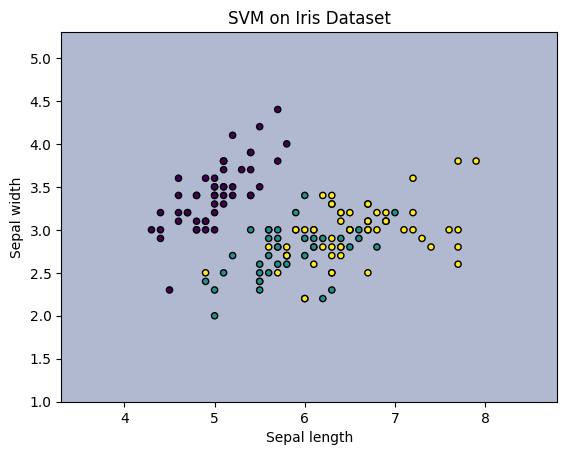

In [2]:
# Importar las bibliotecas necesarias
import numpy as np  # NumPy para operaciones numéricas
import matplotlib.pyplot as plt  # Matplotlib para visualización
from sklearn import datasets  # Scikit-learn para conjuntos de datos
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  # Para normalizar las características
from sklearn.svm import SVC  # Clasificador SVM
from sklearn.metrics import accuracy_score  # Para calcular la precisión del clasificador

# Cargar el conjunto de datos de iris
iris = datasets.load_iris()  # Cargar el conjunto de datos de iris
X = iris.data[:, :2]  # Tomar solo las primeras dos características (longitud y anchura del sépalo)
y = iris.target  # Etiquetas de clase (0, 1, 2)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar las características
scaler = StandardScaler()  # Inicializar el normalizador
X_train_scaled = scaler.fit_transform(X_train)  # Normalizar características de entrenamiento
X_test_scaled = scaler.transform(X_test)  # Normalizar características de prueba

# Entrenar el clasificador SVM
svm_classifier = SVC(kernel='linear', random_state=42)  # Inicializar clasificador SVM lineal
svm_classifier.fit(X_train_scaled, y_train)  # Entrenar el clasificador

# Hacer predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test_scaled)

# Calcular la precisión del clasificador SVM
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del SVM:", accuracy)

# Visualizar los límites de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Definir los límites del eje x
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Definir los límites del eje y
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  # Crear una malla de puntos para el gráfico
                     np.arange(y_min, y_max, 0.1))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])  # Hacer predicciones en la malla de puntos
Z = Z.reshape(xx.shape)  # Dar forma a las predicciones para que coincidan con las dimensiones de la malla

# Visualizar los límites de decisión y los puntos de datos
plt.contourf(xx, yy, Z, alpha=0.4)  # Visualizar los límites de decisión
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')  # Visualizar puntos de datos con colores de clase
plt.xlabel('Sepal length')  # Etiqueta del eje x
plt.ylabel('Sepal width')  # Etiqueta del eje y
plt.title('SVM on Iris Dataset')  # Título del gráfico
plt.show()  # Mostrar el gráfico